In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, matthews_corrcoef, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Read the dataset from CSV
data = pd.read_csv('cybersecurity_attacks.csv')

In [20]:
# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classifier_name):
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
    plt.title(f'Confusion Matrix for {classifier_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [27]:
# Correlation Matrix
def plot_correlation_matrix(data):
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=['number'])
    
    # Compute the correlation matrix
    correlation_matrix = numeric_data.corr()
    
    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Feature Correlation Matrix')
    plt.show()

In [22]:
# Correltation Between Features and the Reponse Variable
def plot_feature_response_correlation(data, response):
    correlation_matrix = data.corr()[response].sort_values(ascending=False)
    # Drop the response variable to avoid a self-correlation of 1
    correlation_matrix = correlation_matrix.drop(response, axis=0)
    
    sns.barplot(x=correlation_matrix.index, y=correlation_matrix.values)
    plt.title(f'Correlation with {response} Variable')
    plt.xlabel('Feature')
    plt.ylabel('Correlation coefficient')
    plt.xticks(rotation=90)  # Rotate the feature names for better readability
    plt.show()

In [12]:
# Identify the target and feature columns
target_column = 'Action Taken'  # Change this to 'Severity Level' or 'Attack Type' as needed
feature_columns = [col for col in data.columns if col != target_column]

# Set the features (X) and target (y)
X = data[feature_columns]
y = data[target_column]

# Optionally, convert categorical features to numerical values using one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first=True avoids the dummy variable trap

# Display the first few rows of the feature set and target variable
print("Features (X):")
print(X_encoded.head())
print("\nTarget (y):")
print(y.head())

In [7]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

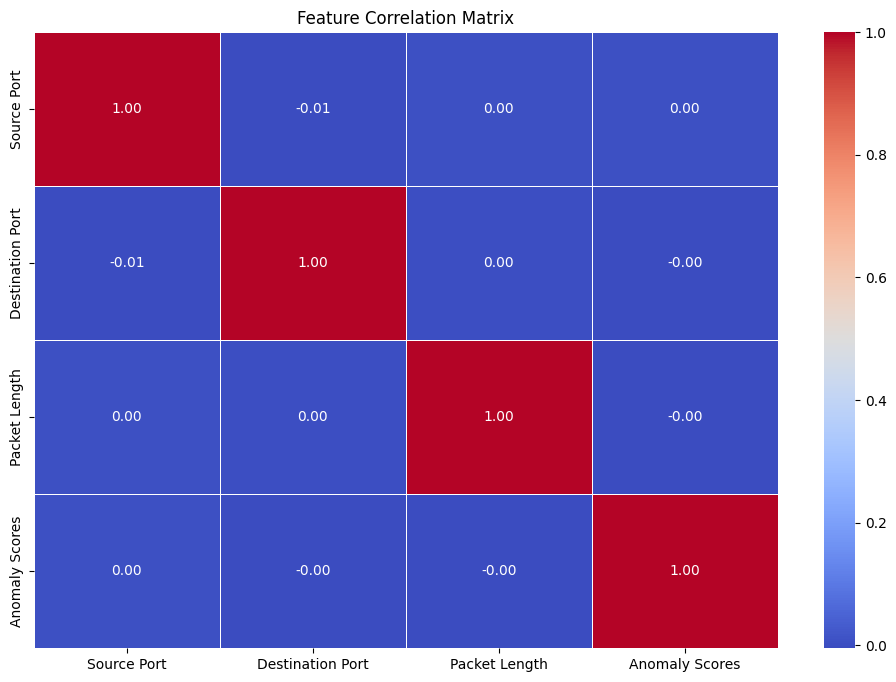

In [16]:
# Plot Correlation Matrix for the features only in the dataset
plot_correlation_matrix(X)

In [26]:
# Add the target variable back for correlation calculation (do not change this)
data_for_correlation = X.copy()
data_for_correlation[target_column] = y

plot_feature_response_correlation(data_for_correlation, 'target_column')

ValueError: could not convert string to float: '2023-05-30 06:33:58'